Import necessary libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Define input (X) and expected output (Y)

In [12]:
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

Define the sigmoid activation function

Formula: f(w, b, x) = 1 / (1 + exp(-(w * x + b)))

In [13]:
def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

Define the Mean Squared Error (MSE) loss function

Formula: E = (1/2) * sum((f(x) - y)^2)

In [14]:
def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

Compute gradient of the error w.r.t bias (b)

Formula: dE/db = (f(x) - y) * f(x) * (1 - f(x))

In [15]:
def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

Compute gradient of the error w.r.t weight (w)

Formula: dE/dw = (f(x) - y) * f(x) * (1 - f(x)) * x

In [16]:
def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

Implement Stochastic Gradient Descent (SGD)

SGD updates model parameters after processing each individual training sample. This means it makes frequent updates, leading to more fluctuations in the parameter values.

In [17]:
def do_stochastic_gradient_descent():
    w, b, eta, max_epochs = -2, -2, 1.0, 1000
    w_path, b_path = [], []

    for i in range(max_epochs):
        for x, y in zip(X, Y):
            dw = grad_w(w, b, x, y)
            db = grad_b(w, b, x, y)
            w -= eta * dw
            b -= eta * db

            # Store path for visualization
            w_path.append(w)
            b_path.append(b)

    return w_path, b_path

Implement Mini-Batch Gradient Descent

Mini-Batch GD processes a small group of samples (batch) at a time instead of updating after every single point (SGD) or using the whole dataset (Vanilla GD).

In [18]:
def do_mini_batch_gradient_descent():
    w, b, eta = -2, -2, 1.0
    mini_batch_size = 2
    w_path, b_path = [], []

    for i in range(1000):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        w -= eta * dw / mini_batch_size
        b -= eta * db / mini_batch_size

        # Store path for visualization
        w_path.append(w)
        b_path.append(b)

    return w_path, b_path

Create a mesh grid for visualization

In [19]:
W = np.linspace(-3, 3, 50)
B = np.linspace(-3, 3, 50)
W, B = np.meshgrid(W, B)

Compute error surface

In [21]:
Z = np.array([[error(w, b) for w, b in zip(W_row, B_row)] for W_row, B_row in zip(W, B)])

Get optimization paths

In [22]:
sgd_w_path, sgd_b_path = do_stochastic_gradient_descent()
mb_w_path, mb_b_path = do_mini_batch_gradient_descent()

Plot comparison of SGD vs Mini-Batch GD

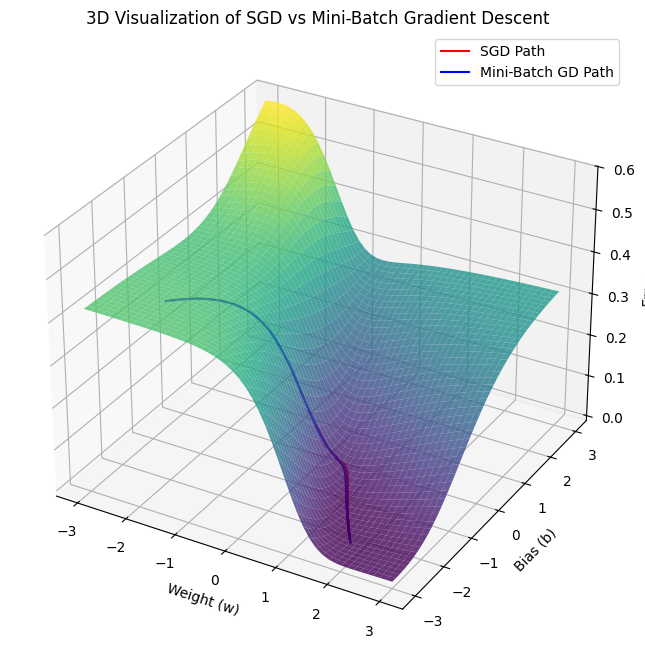

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the error surface
ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)

# Plot SGD path
ax.plot(sgd_w_path, sgd_b_path, [error(w, b) for w, b in zip(sgd_w_path, sgd_b_path)], color='red', label="SGD Path")

# Plot Mini-Batch GD path
ax.plot(mb_w_path, mb_b_path, [error(w, b) for w, b in zip(mb_w_path, mb_b_path)], color='blue', label="Mini-Batch GD Path")

# Labels
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Error')
ax.set_title('3D Visualization of SGD vs Mini-Batch Gradient Descent')

plt.legend()
plt.show()